# Data analysis and prediction for laLiga
### The objective of this notebook is practice. The data was taken from Kaggle, just click the link below if you want to check some information related to the dataset or if you want to download it from the website.
### [click here](https://www.kaggle.com/alvarob96/laliga_2018-19_season_player_stats/version/5)

### In general, the dataset shows all the data about players in LaLiga, like the teams each one belongs to, how many matches they played, their goals and stuff like that.
### So, starting with the basic, let's import the libraries we need to work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Next we are going to read the file that contains all the information, and separate it in different dataframes for future work. The division is going to be done for every position in the game.

In [2]:
data = pd.read_csv("laliga_player_stats_english.csv")

all_columns = data.columns.values.tolist()

data_gk = data[data['Position']=='Goalkeeper']
data_def = data[data['Position']=='Defender']
data_mid = data[data['Position']=='Midfielder']
data_for = data[data['Position']=='Forward']

### Now we are going to see how many players are for every position on the field: Goalkeeper, Defender, Midfielder and Forward. An Histogram should work fine for this.

Text(0.5, 1.0, 'Number of players for position')

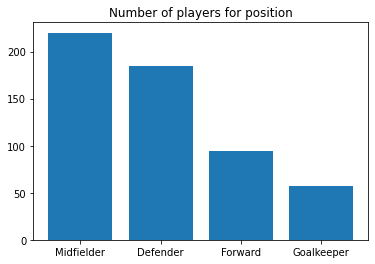

In [3]:
valueC = dict(data['Position'].value_counts())
keysPosition = list(valueC.keys())
valuesPosition = list(valueC.values())

plt.bar(x=keysPosition,height=valuesPosition)
plt.title('Number of players for position')

### As you can see, there are much more defenders and midfielders than goalkeepers and forwards, but that is for the entire database. 
### Now let's see how they are distributed in the teams. A stacked barplot is used for this task.

Text(0.5, 1.0, 'Number of players for team')

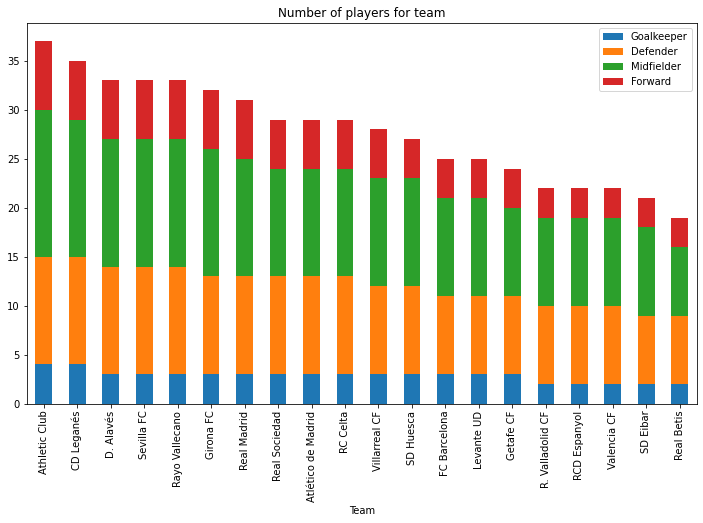

In [4]:
vc1 = dict(data_gk['Team'].value_counts())
keys1 = list(vc1.keys())
values1 = list(vc1.values())

vc2 = dict(data_def['Team'].value_counts())
values2 = list(vc2.values())

vc3 = dict(data_mid['Team'].value_counts())
values3 = list(vc3.values())

vc4 = dict(data_for['Team'].value_counts())
values4 = list(vc4.values())

total = pd.DataFrame()
total['Team'] = keys1
total['Goalkeeper'] = values1
total['Defender'] = values2
total['Midfielder'] = values3
total['Forward'] = values4

total.plot(x='Team', kind='bar',stacked=True,figsize=(12,7))
plt.title('Number of players for team')

### It seems that besides some teams have more players than others, the proportion is kinda the same. 
### The same pattern repeats here, in every team there are more defenders and midfielders than goalkeepers and forwards.

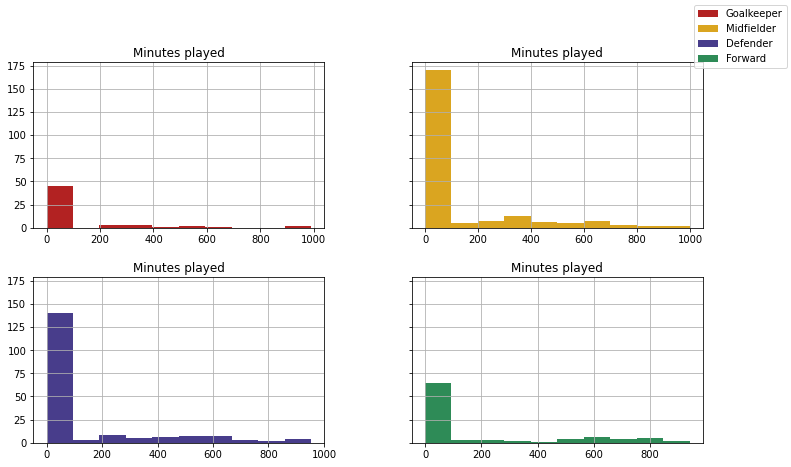

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,7),sharey=True)
data_gk.hist('Minutes played',ax=axs[0][0],color='firebrick',label='Goalkeeper')
data_def.hist('Minutes played',ax=axs[1][0],color='darkslateblue',label='Defender')
data_mid.hist('Minutes played',ax=axs[0][1],color='goldenrod',label='Midfielder')
data_for.hist('Minutes played',ax=axs[1][1],color='seagreen',label='Forward')

fig.legend(loc='upper right')

### And now talking about how much time they spend on the field, is noticed that depite being one position different to another, they keep the same proportion about time spended in the ground. Midfielder and defender have higher bars because their position have more players, compared to the other ones.

### But if we want to see more differences about stadistic between the positions, is recommended to use a boxplot, like the one below.


Text(0.5, 1.0, 'Distribution of Minutes played for every Position')

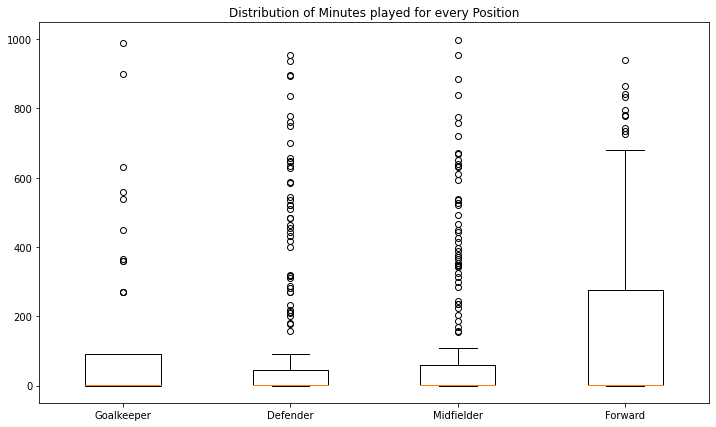

In [9]:
fig2, ax2 = plt.subplots(figsize=(12,7))
info = [data_gk['Minutes played'],data_def['Minutes played'],data_mid['Minutes played'],data_for['Minutes played']]
labels = ['Goalkeeper','Defender','Midfielder','Forward']
ax2.boxplot(info,labels = labels)
ax2.set_title('Distribution of Minutes played for every Position')

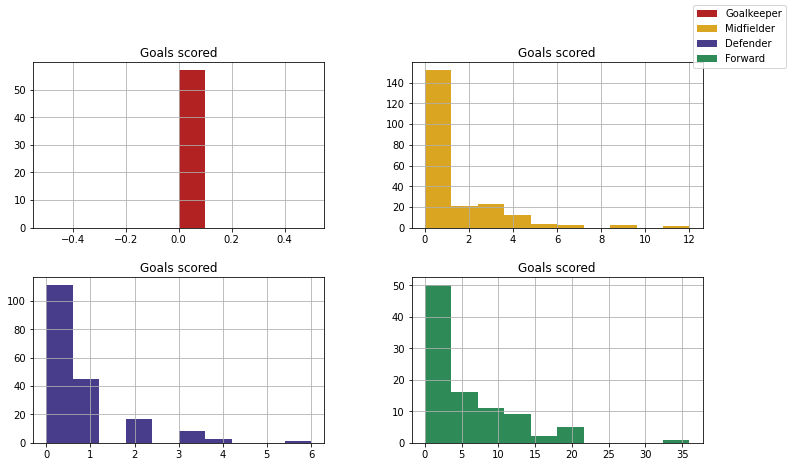

In [7]:
fig2, axs2 = plt.subplots(2,2,figsize=(12,7))
data_gk.hist('Goals scored',ax=axs2[0][0],color='firebrick',label='Goalkeeper')
data_def.hist('Goals scored',ax=axs2[1][0],color='darkslateblue',label='Defender')
data_mid.hist('Goals scored',ax=axs2[0][1],color='goldenrod',label='Midfielder')
data_for.hist('Goals scored',ax=axs2[1][1],color='seagreen',label='Forward')

fig2.legend(loc='upper right')

### Without being a surprise, forwards do more goals in general, while goalkeepers do none.

Text(0.5, 1.0, 'Distribution of Yellow Cards for every Position')

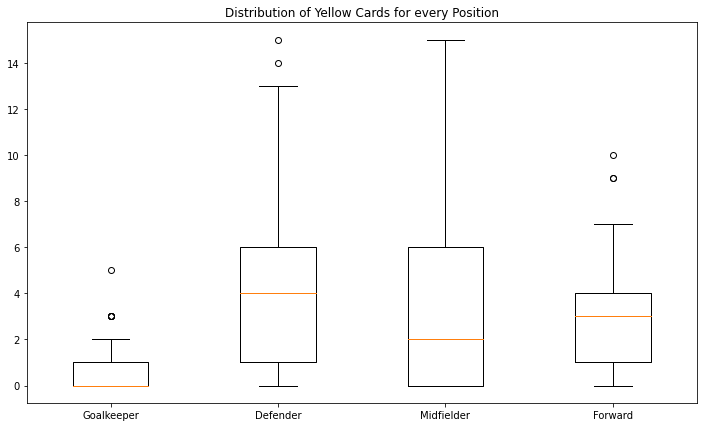

In [8]:
fig2, ax2 = plt.subplots(figsize=(12,7))
info = [data_gk['Yellow Cards'],data_def['Yellow Cards'],data_mid['Yellow Cards'],data_for['Yellow Cards']]
labels = ['Goalkeeper','Defender','Midfielder','Forward']
ax2.boxplot(info,labels = labels)
ax2.set_title('Distribution of Yellow Cards for every Position')

### In this boxplot you can appreciate that the ones who play at the center of the field get more yellow cards in general, but the defenders have the highest average. And again, is no surprise that goalkeepers have the lowest average of getting one.